**Arbol de Expansión Mínimo: Algoritmo PRIM**

Creamos un grafo G a partir de una lista de adyacencia ponderada.

Funciones que permiten leer(readAdjl) y visualizar(adjlShow) una lista de adyacencia.

In [1]:
import graphviz as gv

def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

In [2]:
from collections import defaultdict
import sys

 
class Heap():
 
    def __init__(self):
        self.array = []
        self.size = 0
        self.pos = []
 
    def newMinHeapNode(self, v, dist):
        minHeapNode = [v, dist]
        return minHeapNode
 
    # Una función de utilidad para intercambiar dos nodos de
    # mínimo. Necesario para min heapify
    def swapMinHeapNode(self, a, b):
        t = self.array[a]
        self.array[a] = self.array[b]
        self.array[b] = t
 
    # Una función estándar para acumular en un idx dado
    # Esta función también actualiza la posición de los nodos
    # cuando se intercambian. Se necesita puesto
    # para disminuirClave()
    # Position is needed for decreaseKey()
    def minHeapify(self, idx):
        smallest = idx
        left = 2 * idx + 1
        right = 2 * idx + 2
 
        if left < self.size and self.array[left][1] < \
                                self.array[smallest][1]:
            smallest = left
 
        if right < self.size and self.array[right][1] < \
                                self.array[smallest][1]:
            smallest = right
 
        # Los nodos que se intercambiarán en el montón mínimo
        # si idx no es el más pequeño
        if smallest != idx:
 
            # Intercambiar posiciones
            self.pos[ self.array[smallest][0] ] = idx
            self.pos[ self.array[idx][0] ] = smallest
 
            # Intercambiar nodos
            self.swapMinHeapNode(smallest, idx)
 
            self.minHeapify(smallest)
 
    # Función estándar para extraer el nodo mínimo del heap
    def extractMin(self):
 
        # Devuelve NULL si el montón está vacío
        if self.isEmpty() == True:
            return
 
        # Almacenar el nodo raíz
        root = self.array[0]
 
        # Reemplazar el nodo raíz con el último nodo
        lastNode = self.array[self.size - 1]
        self.array[0] = lastNode
 
        # Actualizar posición del último nodo
        self.pos[lastNode[0]] = 0
        self.pos[root[0]] = self.size - 1
 
        # Reduce heap size and heapify root
        self.size -= 1
        self.minHeapify(0)
 
        return root
 
    def isEmpty(self):
        return True if self.size == 0 else False
 
    def decreaseKey(self, v, dist):
 
        # Get the index of v in  heap array
 
        i = self.pos[v]
 
        # Get the node and update its dist value
        self.array[i][1] = dist
 
        # Travel up while the complete tree is not
        # hepified. This is a O(Logn) loop
        while i > 0 and self.array[i][1] < \
                    self.array[(i - 1) // 2][1]:
 
            # Swap this node with its parent
            self.pos[ self.array[i][0] ] = (i-1)/2
            self.pos[ self.array[(i-1)//2][0] ] = i
            self.swapMinHeapNode(i, (i - 1)//2 )
 
            # move to parent index
            i = (i - 1) // 2;
 
    # A utility function to check if a given vertex
    # 'v' is in min heap or not
    def isInMinHeap(self, v):
 
        if self.pos[v] < self.size:
            return True
        return False
 

In [3]:
def printArr(parent, n):
    for i in range(1, n):
        print("% d - % d" % (parent[i], i))

In [4]:
class Graph():
 
    def __init__(self, V):
        self.V = V
        self.graph = defaultdict(list)
 
    # Adds an edge to an undirected graph
    def addEdge(self, src, dest, weight):
 
        # Add an edge from src to dest.  A new node is
        # added to the adjacency list of src. The node
        # is added at the beginning. The first element of
        # the node has the destination and the second
        # elements has the weight
        newNode = [dest, weight]
        self.graph[src].insert(0, newNode)
 
        # Since graph is undirected, add an edge from
        # dest to src also
        newNode = [src, weight]
        self.graph[dest].insert(0, newNode)
 
    # The main function that prints the Minimum
    # Spanning Tree(MST) using the Prim's Algorithm.
    # It is a O(ELogV) function
    def PrimMST(self):
        # Get the number of vertices in graph
        V = self.V 
         
        # key values used to pick minimum weight edge in cut
        key = []  
         
        # List to store constructed MST
        parent = []
 
        # minHeap represents set E
        minHeap = Heap()
 
        # Initialize min heap with all vertices. Key values of all
        # vertices (except the 0th vertex) is is initially infinite
        for v in range(V):
            parent.append(-1)
            key.append(1e7)
            minHeap.array.append( minHeap.newMinHeapNode(v, key[v]) )
            minHeap.pos.append(v)
 
        # Make key value of 0th vertex as 0 so
        # that it is extracted first
        minHeap.pos[0] = 0
        key[0] = 0
        minHeap.decreaseKey(0, key[0])
 
        # Initially size of min heap is equal to V
        minHeap.size = V;
 
        # In the following loop, min heap contains all nodes
        # not yet added in the MST.
        while minHeap.isEmpty() == False:
 
            # Extract the vertex with minimum distance value
            newHeapNode = minHeap.extractMin()
            u = newHeapNode[0]
 
            # Traverse through all adjacent vertices of u
            # (the extracted vertex) and update their
            # distance values
            for pCrawl in self.graph[u]:
 
                v = pCrawl[0]
 
                # If shortest distance to v is not finalized
                # yet, and distance to v through u is less than
                # its previously calculated distance
                if minHeap.isInMinHeap(v) and pCrawl[1] < key[v]:
                    key[v] = pCrawl[1]
                    parent[v] = u
 
                    # update distance value in min heap also
                    minHeap.decreaseKey(v, key[v])
 
        printArr(parent, V)

Definición de una LA ponderada. Se lee del nodo 0: hacia nodo 1 existe un peso de 4, del nodo 0: hacia nodo 7 existe un peso de 8 ....

In [9]:
%%file 2.in
1|4 7|8
2|8 7|11
3|7 8|2 5|4
4|9 5|14
5|10
6|2
7|1 8|6
8|7

Writing 2.in


Visualizamos el grafo ponderado a partir de la lista de Adyacencia ponderada contenida en el archivo 2.in

 0: [(1, 4), (7, 8)]
 1: [(2, 8), (7, 11)]
 2: [(3, 7), (8, 2), (5, 4)]
 3: [(4, 9), (5, 14)]
 4: [(5, 10)]
 5: [(6, 2)]
 6: [(7, 1), (8, 6)]
 7: [(8, 7)]


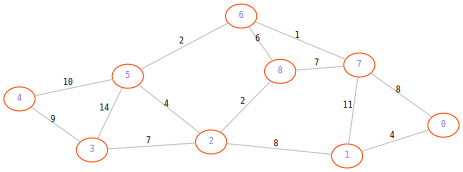

In [15]:
G, _ = readAdjl("2.in", weighted=True)
for i, edges in enumerate(G):
  print(f"{i:2}: {edges}")
adjlShow(G, weighted=True)

Otra forma de crear el grafo y sus aristas ponderadas (sin leer una lista de adyacencia desde un archivo).

In [ ]:
# Driver program to test the above functions
graph = Graph(9)
graph.addEdge(0, 1, 4)
graph.addEdge(0, 7, 8)
graph.addEdge(1, 2, 8)
graph.addEdge(1, 7, 11)
graph.addEdge(2, 3, 7)
graph.addEdge(2, 8, 2)
graph.addEdge(2, 5, 4)
graph.addEdge(3, 4, 9)
graph.addEdge(3, 5, 14)
graph.addEdge(4, 5, 10)
graph.addEdge(5, 6, 2)
graph.addEdge(6, 7, 1)
graph.addEdge(6, 8, 6)
graph.addEdge(7, 8, 7)


In [ ]:
graph.PrimMST()

 0 -  1
 5 -  2
 2 -  3
 3 -  4
 6 -  5
 7 -  6
 0 -  7
 2 -  8
